In [4]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from sklearn.model_selection import train_test_split

In [5]:
file_path = 'FinalDatasetDynamicPricing.csv'
data = pd.read_csv(file_path)
data.head()


,username,service_provider_username,service,price,no_of_pages,topic,date,deadline
0,user1,provider1,App,3500,6,Topic1,2024-03-04,2024-03-05
1,user2,provider2,PPT,575,17,Topic2,2024-03-25,2024-04-04
2,user3,provider3,Frontend,1975,16,Topic3,2024-03-27,2024-04-10
3,user4,provider4,Figma,800,4,Topic4,2024-03-19,2024-04-01
4,user5,provider5,Docs,200,12,Topic5,2024-03-13,2024-03-27


In [6]:
columns_to_keep = ['username', 'service_provider_username', 'service', 'price', 'no_of_pages', 'topic','date', 'deadline']
data = data[columns_to_keep].dropna()
data.head()



,username,service_provider_username,service,price,no_of_pages,topic,date,deadline
0,user1,provider1,App,3500,6,Topic1,2024-03-04,2024-03-05
1,user2,provider2,PPT,575,17,Topic2,2024-03-25,2024-04-04
2,user3,provider3,Frontend,1975,16,Topic3,2024-03-27,2024-04-10
3,user4,provider4,Figma,800,4,Topic4,2024-03-19,2024-04-01
4,user5,provider5,Docs,200,12,Topic5,2024-03-13,2024-03-27


In [7]:
y=data['price']
features=['service','no_of_pages','date','deadline']
X=data[features]
X.describe()

,no_of_pages
count,10000.000000
mean,8.872900
std,5.485486
min,1.000000
25%,4.000000
50%,7.000000
75%,13.000000
max,20.000000


In [8]:
data['date'] = pd.to_datetime(data['date'])
data['deadline'] = pd.to_datetime(data['deadline'])
data['days']=data['deadline']-data['date']



In [9]:
data.drop(['date','deadline'],axis=1,inplace=True)

In [10]:
data.drop(['username','service_provider_username'],axis=1,inplace=True)

In [11]:
data['days']=data['days'].dt.days
data.head()


,service,price,no_of_pages,topic,days
0,App,3500,6,Topic1,1
1,PPT,575,17,Topic2,10
2,Frontend,1975,16,Topic3,14
3,Figma,800,4,Topic4,13
4,Docs,200,12,Topic5,14


In [12]:
data.drop(['topic'],axis=1,inplace=True)

In [13]:
data

,service,price,no_of_pages,days
0,App,3500,6,1
1,PPT,575,17,10
2,Frontend,1975,16,14
3,Figma,800,4,13
4,Docs,200,12,14
...,...,...,...,...
9995,PPT,800,16,5
9996,Frontend,2000,1,8
9997,App,3025,7,11
9998,Figma,700,6,15


In [14]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
y=data['price']
features=['service','no_of_pages','days']
X=data[features]
X.describe()
OrdinalEncoder=OrdinalEncoder()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

lable_X_train=X_train.copy()
lable_X_test=X_test.copy()

lable_X_train[['service']]=OrdinalEncoder.fit_transform(X_train[['service']])
lable_X_test[['service']]=OrdinalEncoder.transform(X_test[['service']])

model=RandomForestRegressor(n_estimators=100,random_state=0)
print(lable_X_train)
print(lable_X_test)


      service  no_of_pages  days
9262      6.0            6    15
3976      4.0            1     6
479       5.0           16    10
1078      1.0            3     1
8075      2.0            1    14
...       ...          ...   ...
5787      5.0           14     9
8395      2.0           15    11
5329      4.0            4     2
2729      4.0           20    15
1750      4.0           18    13

[8000 rows x 3 columns]
      service  no_of_pages  days
4824      0.0            3    10
7482      6.0            6    10
8446      0.0            3    11
2698      6.0            3     6
3655      0.0            6    11
...       ...          ...   ...
2793      5.0            4    11
6         6.0            3    14
9531      1.0           15    11
9011      1.0            6     9
9073      0.0            4     4

[2000 rows x 3 columns]


In [15]:
from sklearn.metrics import mean_absolute_error
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    return mean_absolute_error(y_test,preds)    

In [16]:
get_score(model,lable_X_train,lable_X_test,y_train,y_test)

0.442125

In [17]:
from sklearn.metrics import mean_squared_error
model.fit(lable_X_train,y_train)
preds=model.predict(lable_X_test)

accuracy=mean_squared_error(y_test,preds)
accuracy

3.24490625

In [18]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,preds)
r2

0.9999964405528612

In [19]:
# App -> 0
# Frontend ->4
# Backend -> 1
# Docs ->2
# Figma ->3
# PPT -> 5
# Website ->6

new_data = {
    "service":0,
    "no_of_pages":10,
    "days":9,
}

input_data_as_numpy_array = np.array([
    new_data["service"],new_data["no_of_pages"], new_data["days"]
]).reshape(1, -1)

prediction = model.predict(input_data_as_numpy_array)
print("Predicted Price:", prediction[0])


Predicted Price: 3125.0


d:\Python\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<Axes: xlabel='service', ylabel='price'>

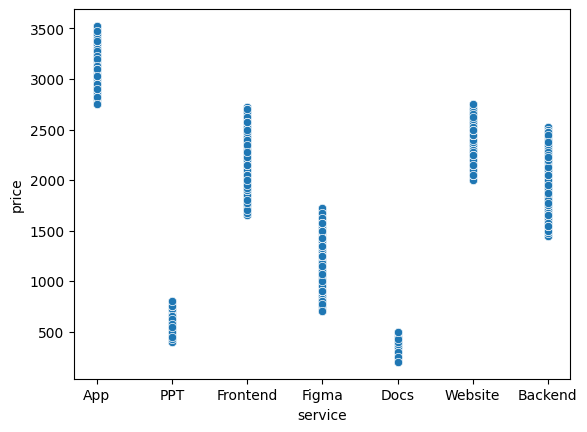

In [20]:
sns.scatterplot(x='service',y='price',data=data)

In [21]:
temp_data = data.copy()
temp_data=temp_data[temp_data['service']=='Figma']

<Axes: xlabel='no_of_pages', ylabel='price'>

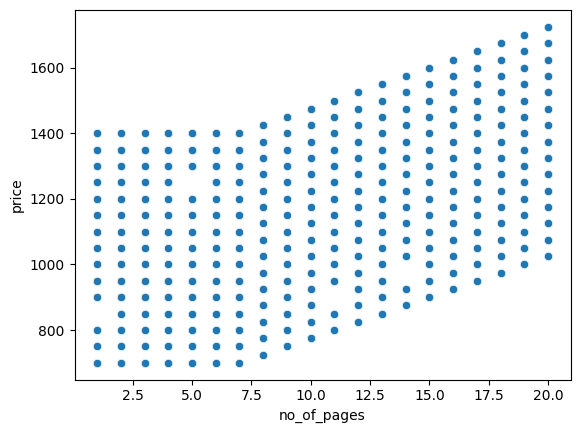

In [22]:
sns.scatterplot(x='no_of_pages',y='price',data=temp_data)

<Axes: xlabel='days', ylabel='no_of_pages'>

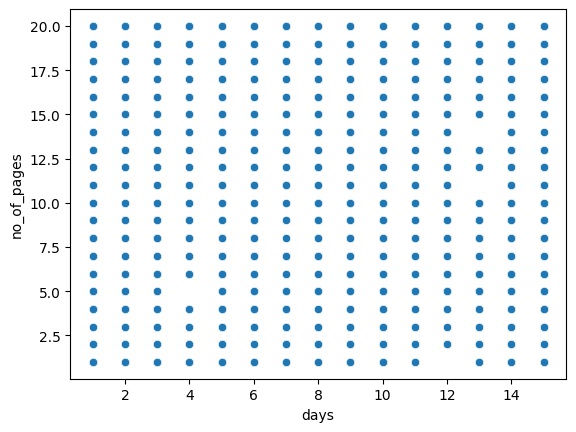

In [23]:
sns.scatterplot(x='days',y='no_of_pages',data=temp_data)

<Axes: xlabel='no_of_pages', ylabel='price'>

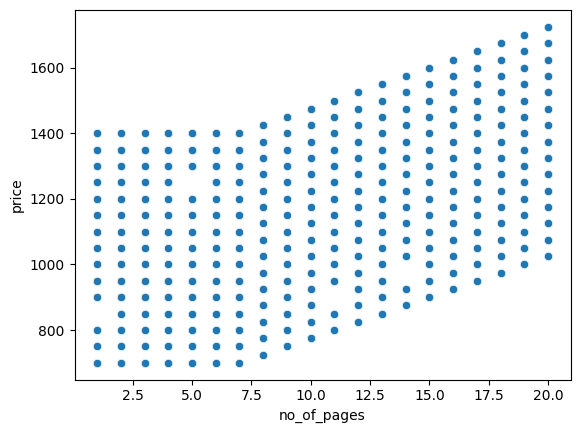

In [24]:
sns.scatterplot(x='no_of_pages',y='price',data=temp_data)

In [25]:
# import joblib
# joblib.dump(model, 'DynamicPricingFinal.joblib')


['DynamicPricingFinal.joblib']